In [82]:
import numpy as np
import nbimporter
from compute_gradient_one_feat import compute_gradient_one_feature_vec
from cost_one_feature import compute_cost_one_feature_vec
from compute_one_feature_ import compute_prediction_one_feature_vec
import math

In [88]:
def compute_gradient_descent_one_feature(X,y,w_in,b_in,alpha,num_itrs,compute_cost,compute_gradient):
    m = X.shape[0]
    w = w_in
    b = b_in
    
    J_hist = []
    w_hist = []
    
    for i in range(num_itrs):
        dj_dw, dj_db = compute_gradient(X,y,w,b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        
        w_hist.append(w)
        J_hist.append(compute_cost(X,y,w,b))
        
        if i % (int(math.ceil(num_itrs/10) + 1)) == 0 :
            print(f" iteration {i}. cost {J_hist[-1]}, w = {w_hist[-1]}, b= {b}")
    
    return w,b,J_hist,w_hist

In [51]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression




In [53]:
df = pd.read_csv("train.csv")
# missing =  df[df["y"].isna()]

df = df.dropna(subset=["y"])
# missing =  df[df["y"].isna()]
# df.describe()

In [55]:
X_train,y_train = df["x"].to_numpy(),df["y"].to_numpy()
y_train.shape


(699,)

In [103]:
w_fin, b_fin, J_hist, w_history = compute_gradient_descent_one_feature(X_train,y_train,0,0,1e-05,10000000,compute_cost_one_feature_vec,compute_gradient_one_feature_vec)

 iteration 0. cost 1560.6448394876934, w = 0.03335424584518538, b= 0.0004993986917045781
 iteration 1000001. cost 3.9338888127520564, w = 1.000507113161239, b= -0.09730210014818413
 iteration 2000002. cost 3.9338764494411462, w = 1.0006442144119658, b= -0.10645331357711371
 iteration 3000003. cost 3.9338763672933252, w = 1.0006553900428368, b= -0.10719926288659949
 iteration 4000004. cost 3.9338763667474943, w = 1.0006563010099097, b= -0.1072600679782061
 iteration 5000005. cost 3.933876366743867, w = 1.0006563752662125, b= -0.10726502442660515
 iteration 6000006. cost 3.933876366743842, w = 1.0006563813191176, b= -0.10726542844514023
 iteration 7000007. cost 3.9338763667438434, w = 1.000656381812517, b= -0.10726546137829662
 iteration 8000008. cost 3.9338763667438434, w = 1.0006563818527245, b= -0.10726546406226532
 iteration 9000009. cost 3.9338763667438434, w = 1.0006563818560013, b= -0.10726546428100149


<Axes: >

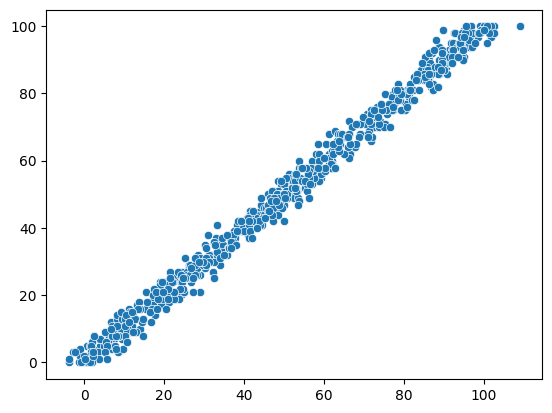

In [86]:
predictions= compute_prediction_one_feature_vec(X_train,w_fin,b_fin)
sns.scatterplot(x=y_train, y=predictions)

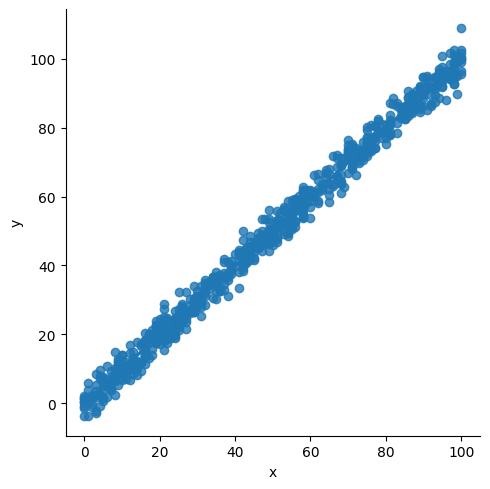

In [74]:
sns.lmplot(data= df, x="x", y = "y")

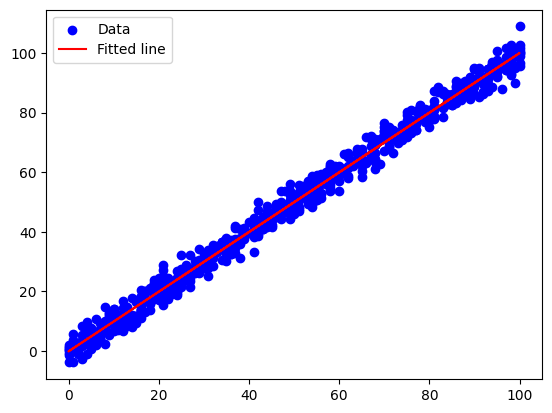

In [87]:
plt.scatter(X_train, y_train, color='blue', label='Data')
plt.plot(X_train, predictions, color='red', label='Fitted line')
plt.legend()
plt.show()

In [96]:
lm = LinearRegression()
lm.fit(X_train.reshape(-1,1),y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
lm.coef_
# X_train.reshape(-1,1).shape
# lm.intercept_

array([1.00065638])

Text(0, 0.5, 'Predicted')

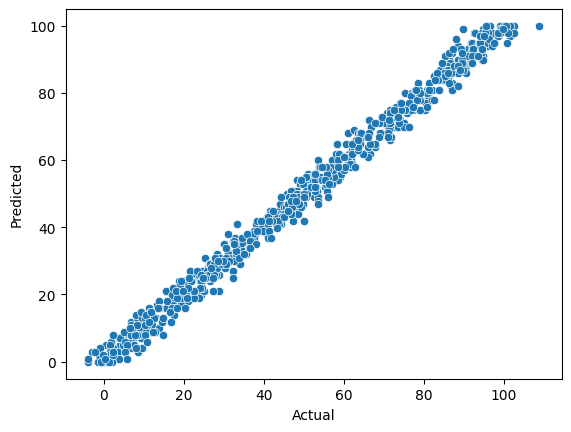

In [77]:
predictions = lm.predict(X_train.reshape(-1,1)).ravel()
predictions
sns.scatterplot(x=y_train, y=predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
# plt.show()

In [107]:
sk_learn_w = lm.coef_[0]
sk_learn_b = lm.intercept_

my_w = w_fin
my_b = b_fin

sk_cost = compute_cost_one_feature_vec(X_train,y_train,sk_learn_w,sk_learn_b)
my_cost = compute_cost_one_feature_vec(X_train,y_train,my_w,my_b)

print(f"sk_cost = {sk_cost}, my_cost = {my_cost} ")
print(f" my_cost < sk_cost {my_cost < sk_cost}")


sk_cost = 3.933876366743844, my_cost = 3.9338763667438434 
 my_cost < sk_cost True
